$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 2 $$

# Introduction

> Use the `keras` from Tensorflow to build ANN model that would fit the credit score data and be able to generalize well.

Use the Credit Score Classification dataset provided [here](https://www.kaggle.com/datasets/parisrohan/credit-score-classification) to train and test your design.

**Notes:**
- Split the data as you see fit and use validation during training.
- You may re-use the EDA, data preparation, and other sections you previously used in ML1 assignemnts.
- Remember that you can use classification metrics from other libraries as well (e.g., `sklearn`)
- Plot the loss, and accuracy against epochs and extract insights on how well of a fit your model is.
- This time the notebook is not prepared with sections and instructions so that you can do it yourself.
- If you are stuck, you can consult the [Keras User Guide](https://keras.io/api/). There are some useful [Code Examples](https://keras.io/examples/) as well.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras import Input
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.impute import KNNImputer
np.random.seed=1234

# `02` Load Dataset

In [ ]:
data=pd.read_csv('train_credit.csv')
data.head()

<ipython-input-2-faa0377b89c5>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('train_credit.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# `03` Split Data

In [ ]:
X=data.drop('Credit_Score',axis=1)
y=data['Credit_Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 27), (20000, 27), (80000,), (20000,))

In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=1234)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 27), (6000, 27), (80000,), (6000,))

In [ ]:
X_train.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,7960
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,12073
Num_Bank_Accounts,0


# `04` Preprocessing

In [ ]:
def preprocessing_data(X):
    #drop the unimportant features
    X=X.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan','Monthly_Inhand_Salary'], axis = 1)

    #Replace unvalid value in column Num_of_Delayed_Payment

    X['Num_of_Delayed_Payment'].unique()

    def replace_value(col):

        X[col] = X[col].astype(str).str.replace('_', '')
        X[col] = X[col].astype(str).str.replace('-', '')
        return X[col]

    X['Num_of_Delayed_Payment']=replace_value('Num_of_Delayed_Payment')
    X['Num_of_Delayed_Payment'].unique()

    # Replace unvalid value in column  Age

    X['Age']=replace_value('Age')

    # convert Age column into numeric

    X['Age']=pd.to_numeric(X['Age'],downcast='float')

    # handle unrealistic values


    X[X['Age'] < 0]['Age'].unique()
    X[X['Age'] >100]['Age'].unique()

    # X[X['Age'] > 100].shape


    median_age = X['Age'].median()
    X['Age'] = X['Age'].apply(lambda x: median_age if x > 100 else x)

    # Num_Credit_Inquiries

    X['Num_Credit_Inquiries'].unique()

    X['Num_Credit_Inquiries']=X['Num_Credit_Inquiries'].fillna(X['Num_Credit_Inquiries'].median())

    X['Num_Credit_Inquiries'] = pd.to_numeric(X['Num_Credit_Inquiries'], errors='coerce')

    #Convert Credit_History_Age into years and fill missing


    def convert_to_years(value):
        if pd.isna(value):
            return np.nan

        parts = value.split(' ')

        if len(parts) >= 4:
            years = int(parts[0])
            months = int(parts[3])
            total_years = years + (months / 12)
            return round(total_years, 2)
        else:
            return np.nan

    #fill null values

    X['Credit_History_Age']= X['Credit_History_Age'].apply(convert_to_years)

    X['Credit_History_Age']=X['Credit_History_Age'].fillna(X['Credit_History_Age'].median())

    # Check if any outliers

    X[X['Credit_History_Age'] >35]['Credit_History_Age'].unique()

    # fill missing in Payment_of_Min_Amount it has one null value
    X['Payment_of_Min_Amount']=X['Payment_of_Min_Amount'].fillna(X['Payment_of_Min_Amount'].mode()[0])



    # Encoding Payment_of_Min_Amount

    pd.set_option('future.no_silent_downcasting', True)
    X['Payment_of_Min_Amount'] = X['Payment_of_Min_Amount'].replace({ "No": 0,"Yes": 1, "NM": 2})

    # Total_EMI_per_month

    X['Total_EMI_per_month']=X['Total_EMI_per_month'].fillna(X['Total_EMI_per_month'].median())


    # Handle Amount_invested_monthly

    X['Amount_invested_monthly'].dtype

    X['Amount_invested_monthly'] = pd.to_numeric(X['Amount_invested_monthly'], errors='coerce')

    X['Amount_invested_monthly']=X['Amount_invested_monthly'].fillna(X['Amount_invested_monthly'].median())

    X['Amount_invested_monthly'].dtype


    # Handle Payment_Behaviour

    X['Payment_Behaviour'].unique()

    X['Payment_Behaviour']=X['Payment_Behaviour'].replace('!@9#%8','unknown')

    X['Payment_Behaviour']=X['Payment_Behaviour'].replace("unknown", X['Payment_Behaviour'].mode()[0])

    X['Payment_Behaviour'].unique()

    X['Payment_Behaviour']=X['Payment_Behaviour'].fillna(X['Payment_Behaviour'].mode()[0])

    #Encoding Payment_Behaviour

    encoder_ord = OrdinalEncoder(categories=[['High_spent_Small_value_payments',
          'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
          'High_spent_Medium_value_payments',
          'High_spent_Large_value_payments',
          'Low_spent_Medium_value_payments']])
    X['Payment_Behaviour'] = encoder_ord.fit_transform(X[['Payment_Behaviour']])

    X['Payment_Behaviour'].unique()

    # Monthly_Balance column


    X['Monthly_Balance'] = pd.to_numeric(X['Monthly_Balance'], errors='coerce')

    X['Monthly_Balance']=X['Monthly_Balance'].fillna(X['Monthly_Balance'].median())


    # Occupation
    X['Occupation'] = X['Occupation'].replace("_______", "Unknown")

    # occupation_encoded

    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    X['Occupation'] = X['Occupation'].astype(str)
    occupation_encoded = encoder.fit_transform(X[['Occupation']])


    occupation_encoded_df = pd.DataFrame(occupation_encoded, columns=encoder.get_feature_names_out(['Occupation']))
    occupation_encoded_df.index = X.index
    X = pd.concat([X, occupation_encoded_df], axis=1)
    X.drop('Occupation', axis=1, inplace=True)

    # Handle Annual_Income
    X['Annual_Income']=replace_value('Annual_Income')

    X['Annual_Income']=pd.to_numeric(X['Annual_Income'],downcast='float')

    # Num of Loan

    X['Num_of_Loan']=replace_value('Num_of_Loan')

    X['Num_of_Loan']=pd.to_numeric(X['Num_of_Loan'],downcast='float')

    #Num_of_Delayed_Payment
    X['Num_of_Delayed_Payment'].unique()
    X['Num_of_Delayed_Payment']=X['Num_of_Delayed_Payment'].replace('nan',X['Monthly_Balance'].median())
    X['Num_of_Delayed_Payment'].unique()
    X['Num_of_Delayed_Payment	']=pd.to_numeric(X['Num_of_Delayed_Payment'],downcast='float')
    X['Num_of_Delayed_Payment'].unique()

    # convert data type Changed_Credit_Limit

    X['Changed_Credit_Limit'] = X['Changed_Credit_Limit'].astype(str).str.replace('[^\d.]', '', regex=True)
    X['Changed_Credit_Limit'] = pd.to_numeric(X['Changed_Credit_Limit'], errors='coerce')
    X['Changed_Credit_Limit']=X['Changed_Credit_Limit'].fillna(0)


    # Outstanding_Debt
    X['Outstanding_Debt'] = X['Outstanding_Debt'].str.replace('[^\d.]', '', regex=True)
    X['Outstanding_Debt'] = pd.to_numeric(X['Outstanding_Debt'], errors='coerce')

    # Credit_Mix

    mode_value = X['Credit_Mix'].mode()[0]
    X['Credit_Mix']=X['Credit_Mix'].replace("_", mode_value)

    encoder_ord_mix = OrdinalEncoder(categories=[['Bad', 'Good', 'Standard']])
    X['Credit_Mix'] = encoder_ord_mix.fit_transform(X[['Credit_Mix']])

    return X




In [ ]:
x_train_cleaned=preprocessing_data(X_train)

In [ ]:
x_train_cleaned.isna().sum()

,0
Age,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0



```
 Training data is cleaned ✅

```

### Preprocessing on validation data

In [ ]:
x_valid_cleaned=preprocessing_data(X_valid)

In [ ]:
x_valid_cleaned.isna().sum()

,0
Age,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0



```
 Vaildation data is cleaned ✅

```

### Preprocessing on test data

In [ ]:
x_test_cleaned=preprocessing_data(X_test)

In [ ]:
x_test_cleaned.isna().sum()

,0
Age,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0



```
 Test data is cleaned ✅

```

# `05` Scaling

### Scaling  Training data

In [ ]:
scaler=RobustScaler()
scaled_data=scaler.fit_transform(x_train_cleaned)
scaled_data

array([[ 0.5       ,  0.61365668,  0.5       , ...,  0.        ,
         0.        , -0.7       ],
       [ 1.3125    , -0.14983755,  0.25      , ...,  0.        ,
         0.        , 32.14458008],
       [-0.875     , -0.11531651,  0.5       , ...,  0.        ,
         1.        ,  0.2       ],
       ...,
       [-0.5625    ,  0.15054307,  0.5       , ...,  0.        ,
         0.        ,  0.1       ],
       [ 0.6875    , -0.37922379, -1.25      , ...,  0.        ,
         0.        , -1.2       ],
       [ 1.3125    ,  1.41569393, -1.        , ...,  1.        ,
         0.        , -1.2       ]])

#### Encoding y train

In [ ]:
score_encoder = LabelEncoder()

y_encoded = score_encoder.fit_transform(y_train)
y_encoded = to_categorical(y_encoded,num_classes=3)


### Scaling Validation data

In [ ]:
scaled_data_vaild=scaler.transform(x_valid_cleaned)
scaled_data_vaild

array([[-0.5625    , -0.36478817,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5625    ,  0.35474335, -0.5       , ...,  0.        ,
         0.        , 32.29659119],
       [-0.8125    ,  0.24471053,  0.25      , ...,  1.        ,
         0.        , -0.5       ],
       ...,
       [-0.625     ,  0.80820021, -0.5       , ...,  1.        ,
         0.        ,  0.5       ],
       [-0.75      , -0.14232422, -1.25      , ...,  0.        ,
         0.        , -0.6       ],
       [ 0.1875    ,  1.83128568,  0.5       , ...,  0.        ,
         0.        ,  0.1       ]])

#### Encoding y vaild

In [ ]:
y_encoded_vaild = score_encoder.transform(y_valid)
y_encoded_vaild = to_categorical(y_encoded_vaild,num_classes=3)

## Scaling Test data

In [ ]:
scaled_data_test=scaler.transform(x_test_cleaned)
scaled_data_test

array([[ 0.75      ,  0.12721754, -1.        , ...,  0.        ,
         0.        , -1.4       ],
       [ 0.3125    , -0.52580048,  0.5       , ...,  0.        ,
         0.        ,  0.6       ],
       [ 0.5       , -0.54621376,  0.75      , ...,  0.        ,
         0.        ,  0.5       ],
       ...,
       [ 1.375     ,  0.64604125, -1.        , ...,  0.        ,
         0.        , -0.5       ],
       [ 0.0625    , -0.20807256, -0.5       , ...,  0.        ,
         0.        , -0.7       ],
       [-1.        , -0.43762927, -0.75      , ...,  0.        ,
         0.        ,  0.4       ]])

#### Encoding y test

In [ ]:
y_encoded_test = score_encoder.transform(y_test)
y_encoded_test = to_categorical(y_encoded_test,num_classes=3)

# first trial model

In [ ]:
mm = Sequential()

mm.add(Input(shape=(scaled_data.shape[1],)))
mm.add(Dense(256,activation='relu'))

mm.add(Dense(128,activation='relu'))


mm.add(Dense(64, activation='relu'))

mm.add(Dense(32, activation='relu'))


mm.add(Dense(3, activation='softmax'))

mm.compile(optimizer=keras.optimizers.Adam(0.0003), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = mm.fit(scaled_data, y_encoded, epochs=250, batch_size=256,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5335 - loss: 1.0764 - val_accuracy: 0.6072 - val_loss: 0.8543
Epoch 2/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6297 - loss: 0.8262 - val_accuracy: 0.6461 - val_loss: 0.8005
Epoch 3/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6509 - loss: 0.7761 - val_accuracy: 0.6479 - val_loss: 0.7696
Epoch 4/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6552 - loss: 0.7632 - val_accuracy: 0.6626 - val_loss: 0.7568
Epoch 5/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6635 - loss: 0.7538 - val_accuracy: 0.6663 - val_loss: 0.7524
Epoch 6/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6665 - loss: 0.7390 - val_accuracy: 0.6681 - val_loss: 0.7476
Epoch 7/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6744 - loss: 0.7296 - val_accuracy: 0.6725 - val_loss: 0.7466
Epoch 8/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6742 - loss: 0.7273 - val_acc

In [ ]:
mm.evaluate(scaled_data, y_encoded)

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7035 - loss: 0.6500


[0.6607945561408997, 0.702162504196167]

In [ ]:
mm.evaluate(scaled_data_vaild, y_encoded_vaild)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6842 - loss: 0.7131


[0.7184543013572693, 0.6830000281333923]

In [ ]:
y_pred_3=mm.predict(scaled_data_vaild)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
y_pred_3

array([[0.00119217, 0.80035657, 0.19845137],
       [0.40348145, 0.2067754 , 0.38974306],
       [0.5134486 , 0.16765   , 0.31890136],
       ...,
       [0.32747743, 0.17675309, 0.49576947],
       [0.6269029 , 0.01424776, 0.35884932],
       [0.02598893, 0.08485288, 0.8891582 ]], dtype=float32)

In [ ]:
y_pred_classes = np.argmax(y_pred_3, axis=1)
report = classification_report(y_encoded_vaild, to_categorical(y_pred_classes, num_classes=3))
print(report)

              precision    recall  f1-score   support

           0       0.56      0.64      0.60      2531
           1       0.71      0.60      0.65      3997
           2       0.72      0.74      0.73      7472

   micro avg       0.68      0.68      0.68     14000
   macro avg       0.66      0.66      0.66     14000
weighted avg       0.69      0.68      0.68     14000
 samples avg       0.68      0.68      0.68     14000



## Second trial model

In [ ]:
mm2 = Sequential()

mm2.add(Input(shape=(scaled_data.shape[1],)))
mm2.add(Dense(256,activation='relu'))
mm2.add(BatchNormalization())

mm2.add(Dense(128,activation='relu'))
mm2.add(BatchNormalization())

mm2.add(Dense(64, activation='relu'))
mm2.add(BatchNormalization())

mm2.add(Dense(32, activation='relu'))
mm2.add(BatchNormalization())

mm2.add(Dense(3, activation='softmax'))

mm2.compile(optimizer=keras.optimizers.Adam(0.0003), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = mm2.fit(scaled_data, y_encoded, epochs=250, batch_size=256,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5257 - loss: 1.0262 - val_accuracy: 0.5918 - val_loss: 0.8844
Epoch 2/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6311 - loss: 0.8211 - val_accuracy: 0.6492 - val_loss: 0.7894
Epoch 3/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6442 - loss: 0.7791 - val_accuracy: 0.6464 - val_loss: 0.7718
Epoch 4/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6576 - loss: 0.7557 - val_accuracy: 0.6584 - val_loss: 0.7541
Epoch 5/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6643 - loss: 0.7411 - val_accuracy: 0.6587 - val_loss: 0.7460
Epoch 6/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6649 - loss: 0.7384 - val_accuracy: 0.6690 - val_loss: 0.7373
Epoch 7/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6705 - loss: 0.7328 - val_accuracy: 0.6671 - val_loss: 0.7342
Epoch 8/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6704 - loss: 0.7251 - val_a

### evaluate model

train accuracy and loss

In [ ]:
mm2.evaluate(scaled_data, y_encoded)

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7272 - loss: 0.6109


[0.6260296106338501, 0.7212874889373779]

vaild accuracy and loss

In [ ]:
mm2.evaluate(scaled_data_vaild, y_encoded_vaild)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6919 - loss: 0.6990


[0.7022361755371094, 0.6855000257492065]

In [ ]:
y_pred_mm2=mm2.predict(scaled_data_vaild)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred_classes = np.argmax(y_pred_mm2, axis=1)
report = classification_report(y_encoded_vaild, to_categorical(y_pred_classes, num_classes=3))
print(report)

              precision    recall  f1-score   support

           0       0.59      0.56      0.58      2531
           1       0.69      0.65      0.67      3997
           2       0.71      0.75      0.73      7472

   micro avg       0.69      0.69      0.69     14000
   macro avg       0.66      0.65      0.66     14000
weighted avg       0.68      0.69      0.68     14000
 samples avg       0.69      0.69      0.69     14000



# Third  trial model

In [ ]:
model_cred = Sequential()

model_cred.add(Input(shape=(scaled_data.shape[1],)))
model_cred.add(Dense(256,activation='relu'))
model_cred.add(BatchNormalization())
model_cred.add(Dropout(0.3))

model_cred.add(Dense(128,activation='relu'))
model_cred.add(BatchNormalization())
model_cred.add(Dropout(0.3))

model_cred.add(Dense(64, activation='relu'))
model_cred.add(BatchNormalization())
model_cred.add(Dropout(0.3))

model_cred.add(Dense(32, activation='relu'))
model_cred.add(BatchNormalization())
model_cred.add(Dropout(0.25))

model_cred.add(Dense(3, activation='softmax'))

model_cred.compile(optimizer=keras.optimizers.Adam(0.0003), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model_cred.fit(scaled_data, y_encoded, epochs=250, batch_size=256,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3728 - loss: 1.3285 - val_accuracy: 0.5899 - val_loss: 0.9509
Epoch 2/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5095 - loss: 1.0731 - val_accuracy: 0.6243 - val_loss: 0.8609
Epoch 3/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5649 - loss: 0.9671 - val_accuracy: 0.6316 - val_loss: 0.8139
Epoch 4/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5876 - loss: 0.9098 - val_accuracy: 0.6342 - val_loss: 0.7945
Epoch 5/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6013 - loss: 0.8818 - val_accuracy: 0.6394 - val_loss: 0.7814
Epoch 6/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6056 - loss: 0.8538 - val_accuracy: 0.6417 - val_loss: 0.7725
Epoch 7/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6157 - loss: 0.8352 - val_accuracy: 0.6438 - val_loss: 0.7651
Epoch 8/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6200 - loss: 0.8213 - 

### evaluate model

train accuracy and loss

In [ ]:
model_cred.evaluate(scaled_data, y_encoded)

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7306 - loss: 0.6078


[0.6183163523674011, 0.7262125015258789]

vaild accuracy and loss

In [ ]:
model_cred.evaluate(scaled_data_vaild, y_encoded_vaild)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7098 - loss: 0.6672


[0.6692704558372498, 0.7029285430908203]

predict

In [ ]:
y_pred_3=model_cred.predict(scaled_data_vaild)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred_3

array([[1.6338383e-04, 8.1675833e-01, 1.8307830e-01],
       [2.0592992e-01, 5.0742567e-01, 2.8664440e-01],
       [5.9679925e-01, 1.5671125e-01, 2.4648947e-01],
       ...,
       [1.6853061e-01, 8.6006887e-02, 7.4546242e-01],
       [4.5856288e-01, 1.0180228e-01, 4.3963486e-01],
       [2.5720851e-02, 1.3773577e-01, 8.3654326e-01]], dtype=float32)

In [ ]:
y_pred_classes = np.argmax(y_pred_3, axis=1)
report = classification_report(y_encoded_vaild, to_categorical(y_pred_classes, num_classes=3))
print(report)

              precision    recall  f1-score   support

           0       0.57      0.69      0.62      2531
           1       0.72      0.66      0.69      3997
           2       0.75      0.73      0.74      7472

   micro avg       0.70      0.70      0.70     14000
   macro avg       0.68      0.70      0.69     14000
weighted avg       0.71      0.70      0.71     14000
 samples avg       0.70      0.70      0.70     14000



#### 💡 Continue with the third model (model_cred)

### plotting Training & Validation

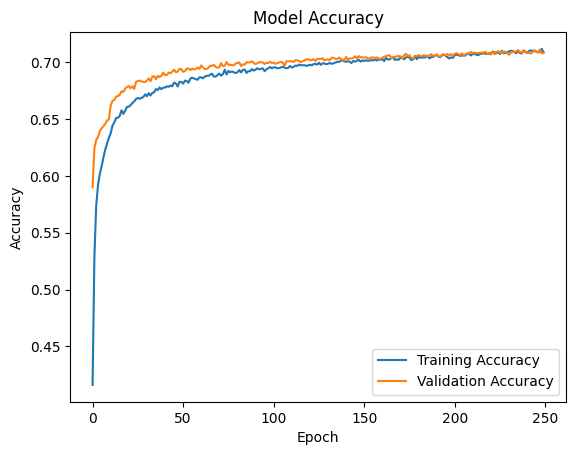

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

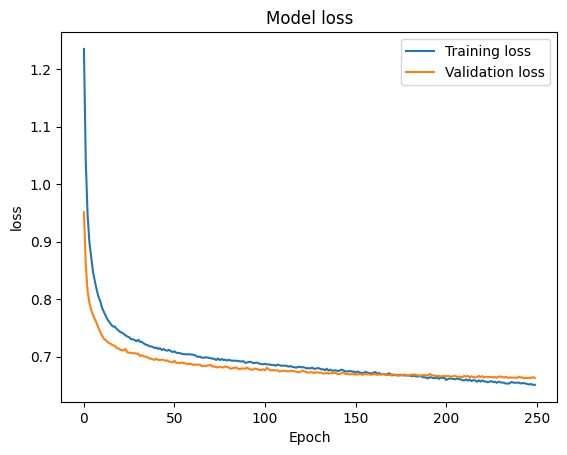

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

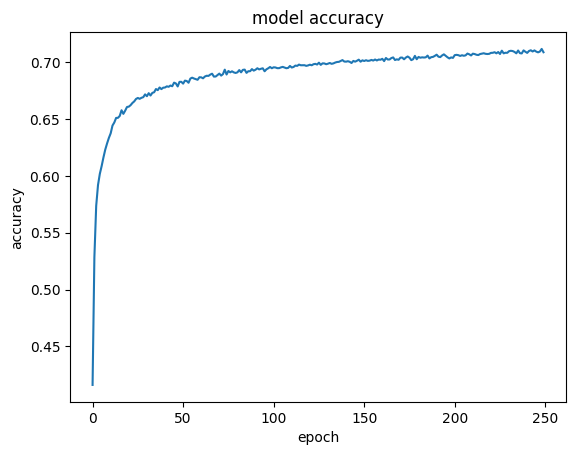

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

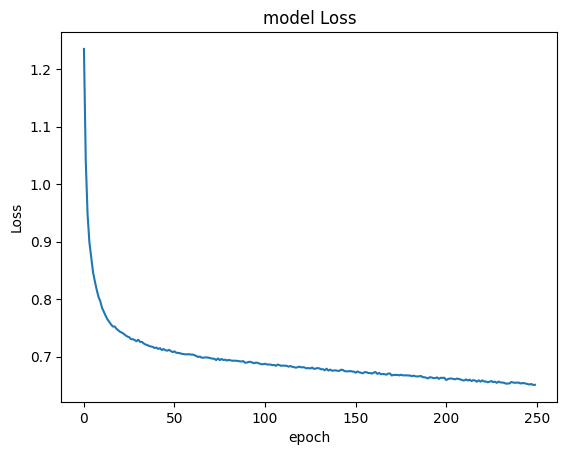

In [ ]:
plt.plot(history.history['loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## evaluate Test data

In [ ]:
model_cred.evaluate(scaled_data_test, y_encoded_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7142 - loss: 0.6606


[0.6516662836074829, 0.7196666598320007]



```
 Test Data Accuracy about 71%
```



In [ ]:
y_pred_test=model_cred.predict(scaled_data_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred_test

array([[3.7466446e-01, 1.7467970e-01, 4.5065582e-01],
       [1.8036690e-04, 7.9493886e-01, 2.0488080e-01],
       [3.2956203e-04, 7.7897048e-01, 2.2069988e-01],
       ...,
       [7.5406706e-01, 2.2130916e-03, 2.4371988e-01],
       [3.8408503e-02, 1.7530473e-02, 9.4406098e-01],
       [4.3463535e-03, 6.6377395e-01, 3.3187971e-01]], dtype=float32)

In [ ]:
y_pred_classes = np.argmax(y_pred_test, axis=1)
report = classification_report(y_encoded_test, to_categorical(y_pred_classes, num_classes=3))
print(report)

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1101
           1       0.74      0.66      0.70      1762
           2       0.74      0.77      0.76      3137

   micro avg       0.72      0.72      0.72      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.72      0.72      0.72      6000
 samples avg       0.72      0.72      0.72      6000

